In [1]:
#first we import the package that allows us to plot 
%matplotlib inline

In [53]:
#create path route to test samples and actualy expirement
# path = "data/dogscats/"
path = "data/dogscats/sample/"

In [3]:
#A few basic libraries that we'll need for the initial exercises:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt



In [4]:
#We have created a file most imaginatively called 'utils.py' to store 
#any little convenience functions we'll want to use. We will discuss these as we use them.

import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


**The punchline: state of the art custom model in 7 lines of code**

In [5]:
batch_size = 64

In [6]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

**The code BELOW will work for any image recognition task, with any number of categories! All you have to do is to put your images into one folder per category, and run the code above.**

Let's take a look at how this works, step by step...

In [7]:
# THIS LINE OF CODE IS MAD IMPORTANT

#first create the VGG Object:
vgg = Vgg16()

In [8]:
#Let's grab batches of data from our training folder:

batches = vgg.get_batches(path+ 'train', batch_size = 4)

Found 23000 images belonging to 2 classes.


**(BTW, when Keras refers to 'classes', it doesn't mean python classes - but rather it refers to the categories of the labels, such as 'pug', or 'tabby'.)
Batches is just a regular python iterator. Each iteration returns both the images themselves, as well as the labels.**

In [12]:
imgs,labels = next(batches)

#create imgs,labels and set them to next(batches)

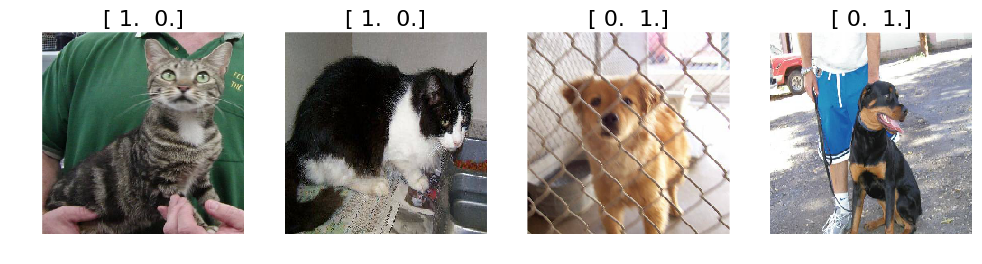

In [13]:
plots(imgs, titles = labels)

#calls the plot function, which CREATES this thing called "imgs", and sets the title parameter to our labels
#muthafuckin cats byatch

**We can now pass the images to Vgg16's predict() function to get back probabilities, category indexes, and category names for each image's VGG prediction.** 


In [14]:
vgg.predict(imgs, True)

#the object vgg { 
#    predict: [OUTPUT]
#   }

# The category indexes are based on the ordering of categories used in the VGG model 
# - e.g here are the first four:

(array([ 0.6786,  0.0982,  0.2996,  0.4032], dtype=float32),
 array([281, 539, 260, 234]),
 [u'tabby', u'doormat', u'chow', u'Rottweiler'])

In [35]:
vgg.classes[:4]

#the object vgg { 
#  classes: [a,b,c,d]
# }

#(Note that, other than creating the Vgg16 object, none of these steps are necessary to build a model; 

#they are just showing how to use the class to view imagenet predictions.)

['cats', 'dogs']

# Use our Vgg16 class to finetune a Dogs vs Cats model #

In [36]:
#We create our batches just like before, and making the validation set available as well. 
#A 'batch' (or mini-batch as it is commonly known) is simply a subset of the training data 
#- we use a subset at a time when training or predicting, in order to speed up training, 
#and to avoid running out of memory.

batch_size=64

In [56]:
batches = vgg.get_batches(path+ 'train', batch_size = batch_size)
val_batches = vgg.get_batches(path+ 'valid', batch_size = batch_size*2)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


Calling finetune() modifies the model such that it will be trained based on the data in the batches provided - in this case, to predict either 'dog' or 'cat'.

In [57]:
vgg.finetune(batches)

We finally fit() the parameters of the model using the training data, reporting the accuracy on the validation set after every epoch. 

**an epock is one full pass through the training data --> 1 iteration through the data**

In [58]:
vgg.fit(batches,val_batches, nb_epoch=1)

Epoch 1/1
160/160 [==============================] - 5s - loss: 1.1736 - acc: 0.6312 - val_loss: 0.2430 - val_acc: 0.9000


In [59]:
vgg.model.save_weights(path +'results/ft1.h1')

In [61]:
vgg.fit(batches,val_batches,nb_epoch=1)
#2!!

Epoch 1/1
160/160 [==============================] - 5s - loss: 0.3044 - acc: 0.8875 - val_loss: 0.1103 - val_acc: 0.9750


In [62]:
vgg.model.save_weights(path +'results/ft2.h1')

In [63]:
vgg.fit(batches,val_batches,nb_epoch=1)
#3!!

Epoch 1/1
160/160 [==============================] - 5s - loss: 0.1358 - acc: 0.9437 - val_loss: 0.0757 - val_acc: 0.9750


In [65]:
vgg.model.save_weights(path +'results/ft3.h1')

In [66]:
vgg.model.optimizer.lr = 0.01 

In [67]:
vgg.fit(batches,val_batches,nb_epoch=1)
#4!!

Epoch 1/1
160/160 [==============================] - 5s - loss: 0.1386 - acc: 0.9188 - val_loss: 0.0599 - val_acc: 0.9750


In [68]:
vgg.model.save_weights(path +'results/ft4.h1')

In [70]:
vgg.fit(batches,val_batches,nb_epoch=1)

Epoch 1/1
160/160 [==============================] - 5s - loss: 0.0837 - acc: 0.9688 - val_loss: 0.0572 - val_acc: 0.9750


In [71]:
vgg.model.save_weights(path +'results/ft6.h1')

In [72]:
vgg.model.load_weights(path+'results/ft6.h1')

In [73]:
vgg.fit(batches,val_batches,nb_epoch=1)

Epoch 1/1
160/160 [==============================] - 5s - loss: 0.0328 - acc: 0.9938 - val_loss: 0.0598 - val_acc: 0.9750


In [74]:
vgg.model.save_weights(path +'results/ft7.h1')

In [75]:
vgg.fit(batches,val_batches,nb_epoch=1)

Epoch 1/1
160/160 [==============================] - 6s - loss: 0.0162 - acc: 0.9938 - val_loss: 0.0647 - val_acc: 0.9750
